# 0. Download packages

In [1]:
!pip install -q git+https://github.com/p-sin/text2nca.git

In [2]:
!pip install -q git+https://github.com/google-research/self-organising-systems
!pip install -q dalle-mini
!pip install -q git+https://github.com/patil-suraj/vqgan-jax.git
!pip install -q selenium

     |████████████████████████████████| 235 kB 6.2 MB/s 
     |████████████████████████████████| 53 kB 1.9 MB/s 
     |████████████████████████████████| 4.7 MB 61.5 MB/s 
     |████████████████████████████████| 1.8 MB 23.7 MB/s 
     |████████████████████████████████| 197 kB 57.9 MB/s 
     |████████████████████████████████| 202 kB 63.0 MB/s 
     |████████████████████████████████| 596 kB 56.7 MB/s 
     |████████████████████████████████| 145 kB 67.1 MB/s 
     |████████████████████████████████| 217 kB 60.0 MB/s 
     |████████████████████████████████| 7.5 MB 59.2 MB/s 
     |████████████████████████████████| 51 kB 1.7 MB/s 
     |████████████████████████████████| 76 kB 4.2 MB/s 
     |████████████████████████████████| 6.6 MB 47.9 MB/s 
     |████████████████████████████████| 101 kB 11.9 MB/s 
     |████████████████████████████████| 157 kB 64.5 MB/s 
     |████████████████████████████████| 181 kB 62.9 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
     |█████████████████

In [11]:
!pip install --quiet ml_collections

     |████████████████████████████████| 77 kB 2.8 MB/s 


Execute the following cell to find out what GPU you got allocated:

In [3]:
!nvidia-smi -L

GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-45831d57-7af9-e977-25e2-b882cc307a3e)


In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from PIL import Image

# 1. Choose a texture provider

Note: To download the Dall-E Mini model, you may need to get a (free) api key from wandb.ai.

In [5]:
import sys
from text2nca import available_providers

print("Pick a provider to source images from")
print("Choices are:")
for i, provider in enumerate(available_providers):
  print(str(i) + ". " + provider.__name__)

provider = None
choice = input()
if not choice.isnumeric():
  print("Error: Must be integer")
elif int(choice) < 0 or int(choice) >= len(available_providers):
  print("Error: Integer out of range")
else:
  provider = available_providers[int(choice)]()

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


Pick a provider to source images from
Choices are:
0. DallEMini
1. DTextDataset
2. FreeStockTextures
2


In [6]:
print(provider)

# 2. Enter a prompt

In [46]:
prompt = input("Enter some keyword to search for: ")
images = provider.get_image(prompt)

Enter some keyword to search for: tree bark


# 3. Pick an image

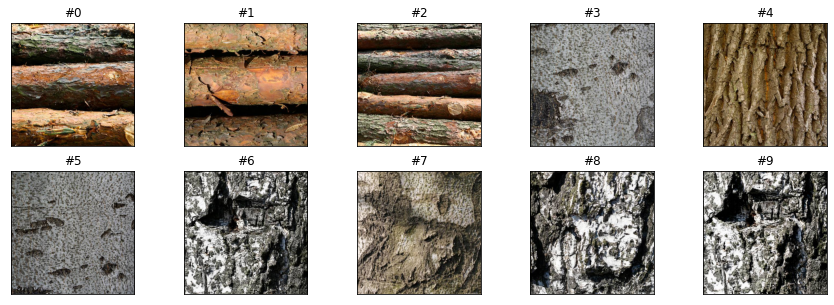

In [47]:
from math import ceil

fig = plt.figure(figsize=(15, 5))
columns = 4
rows = 5

ax = []
for i, image in enumerate(images):
    ax.append(fig.add_subplot(ceil(len(images)/5), min(len(images), 5), i+1))
    ax[-1].set_title("#"+str(i)) 
    
    # Hide grid lines
    ax[-1].grid(False)

    # Hide axes ticks
    ax[-1].set_xticks([])
    ax[-1].set_yticks([])
    plt.imshow(image)

plt.show() 


Pick an image by entering the number: 4
[<PIL.Image.Image image mode=RGB size=460x460 at 0x7FC629097CD0>, <PIL.Image.Image image mode=RGB size=460x460 at 0x7FC4CD574D10>, <PIL.Image.Image image mode=RGB size=460x460 at 0x7FC5561879D0>, <PIL.Image.Image image mode=RGB size=460x460 at 0x7FC53E7E1810>, <PIL.Image.Image image mode=RGB size=128x128 at 0x7FC53E23F9D0>, <PIL.Image.Image image mode=RGB size=460x460 at 0x7FC4CD77A410>, <PIL.Image.Image image mode=RGB size=460x460 at 0x7FC556261C90>, <PIL.Image.Image image mode=RGB size=460x460 at 0x7FC556261350>, <PIL.Image.Image image mode=RGB size=460x460 at 0x7FC556261810>, <PIL.Image.Image image mode=RGB size=460x460 at 0x7FC556169AD0>]


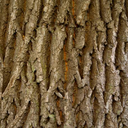

In [48]:
image_choice = input("Pick an image by entering the number: ")

if not image_choice.isnumeric():
  print("Error: Must be integer")
elif int(image_choice) < 0 or int(image_choice) >= len(images):
  print("Error: Integer out of range")
else:
  image = images[int(image_choice)]
  image.thumbnail((128, 128), Image.ANTIALIAS)
  display(image)

# 4. Train the NCA

In [49]:
from text2nca.nca.texturenca import TextureNCA
nca = TextureNCA("test", image)

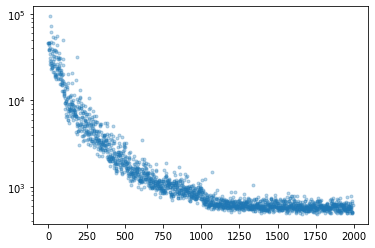

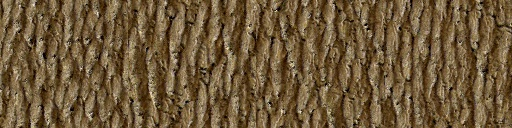

 1991 616.35046
saved model as "test"


In [50]:
nca.train()